In [1]:
library("tidyverse")

Warning message:
"pakiet 'tidyverse' został zbudowany w wersji R 4.1.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"pakiet 'ggplot2' został zbudowany w wersji R 4.1.3"
Warning message:
"pakiet 'tibble' został zbudowany w wersji R 4.1.3"
Warning message:
"pakiet 'tidyr' został zbudowany w wersji R 4.1.3"
Warning message:
"pakiet 'readr' został zbudowany w wersji R 4.1.3"
Warning message:
"pakiet 'purrr' został zbudowany w wersji R 4.1.3"
Warning message:
"pakiet 'dplyr' został zbudowany w wersji R 4.1.3"
Warning message:
"pakiet 'stringr' został zbudowany w wersji R 4.1.3"
Warning message:
"pakiet 'forcats' został zbudowany w wersji R 4.1.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conf

#### Zadanie 
Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

   1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu) (1p.)
   2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) (1p.)
   3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów) (1p.)
   4. Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyników każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu. (1p.)



In [2]:
spec(results <- read_csv("mydataframe1.csv", show_col_types = FALSE))

cols(
  vector_size = col_double(),
  measure = col_double(),
  second_object = col_character(),
  time = col_double()
)

In [3]:
combined <- results %>% 
    group_by(vector_size, second_object) %>%
    summarise(
        time_sd = sd(time),
        time_mean = mean(time),
        .groups = 'keep'
    )  %>% 
    arrange(second_object, vector_size)

combined

vector_size,second_object,time_sd,time_mean
<dbl>,<chr>,<dbl>,<dbl>
10,matrix,3.150467e-06,0.00000189
100,matrix,4.289988e-06,0.00000482
250,matrix,2.068199e-05,0.00002724
500,matrix,7.301431e-05,0.00012739
750,matrix,2.051440e-04,0.00027576
1000,matrix,1.832891e-04,0.00040267
2500,matrix,8.238329e-04,0.00343417
4000,matrix,1.821057e-03,0.00874693
5000,matrix,2.409081e-04,0.01230250


In [4]:
vectors <- combined %>% filter(second_object=="vector")

In [5]:
matrices <- combined %>% filter(second_object=="matrix")

In [6]:
vec <- ggplot(vectors, aes(x=vector_size, y=time_mean)) + geom_point(size = 3, colour = "#BD3027") +
geom_errorbar(aes(ymin=time_mean-time_sd, ymax=time_mean+time_sd), width=.2, colour = "#BD3027") + 
labs(y="time(s)", x="vector size") + ggtitle("average scalar multiplication runtime")

mat <- ggplot(matrices, aes(x=vector_size, y=time_mean)) + geom_point(size = 3, colour="#7FC0C6") +
geom_errorbar(aes(ymin=time_mean-time_sd, ymax=time_mean+time_sd), width=.2,  colour="#7FC0C6") + 
labs(y="time(s)", x="matrix size") + ggtitle("average matrix multiplication runtime")

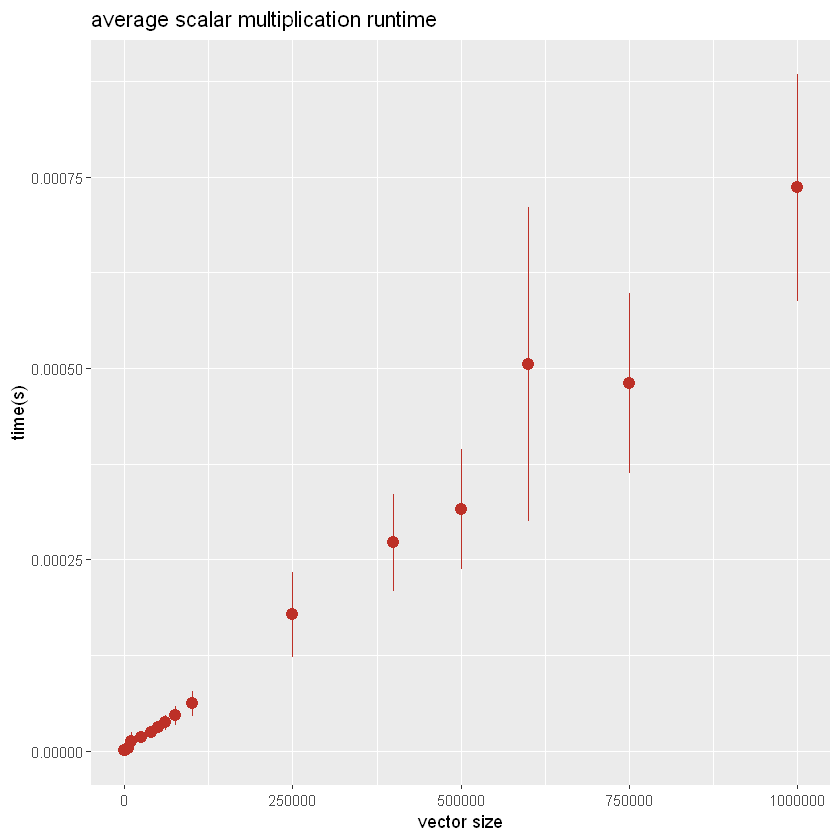

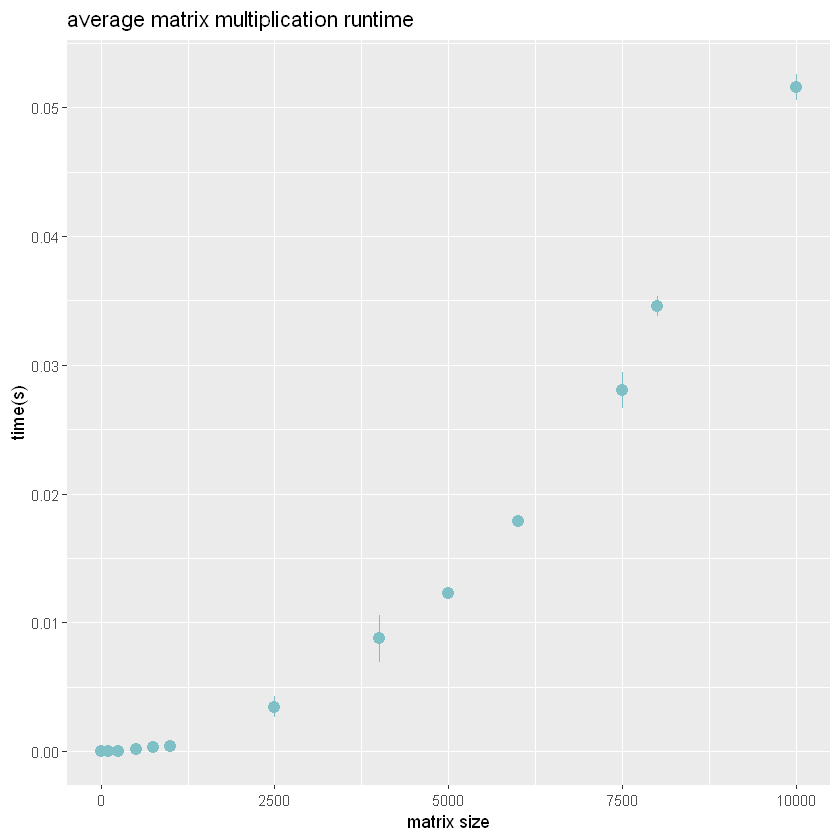

In [7]:
vec
mat

In [8]:
fit_vec <- lm(time_mean ~ poly(vector_size, 1, raw=TRUE), data=vectors)
fit_vec


Call:
lm(formula = time_mean ~ poly(vector_size, 1, raw = TRUE), data = vectors)

Coefficients:
                     (Intercept)  poly(vector_size, 1, raw = TRUE)  
                      -3.091e-06                         7.188e-10  


In [9]:
new_vec = data.frame(vector_size = seq(5, 1000000, length.out=250))
new_vec$time_mean = predict(fit_vec, new_vec)

In [10]:
fit_mat <- lm(time_mean ~ poly(vector_size, 2, raw=TRUE), data=matrices)
fit_mat


Call:
lm(formula = time_mean ~ poly(vector_size, 2, raw = TRUE), data = matrices)

Coefficients:
                      (Intercept)  poly(vector_size, 2, raw = TRUE)1  
                        4.758e-05                         -8.744e-08  
poly(vector_size, 2, raw = TRUE)2  
                        5.263e-10  


In [11]:
new_mat = data.frame(vector_size = seq(5, 10000, length.out=250))
new_mat$time_mean = predict(fit_mat, new_mat)

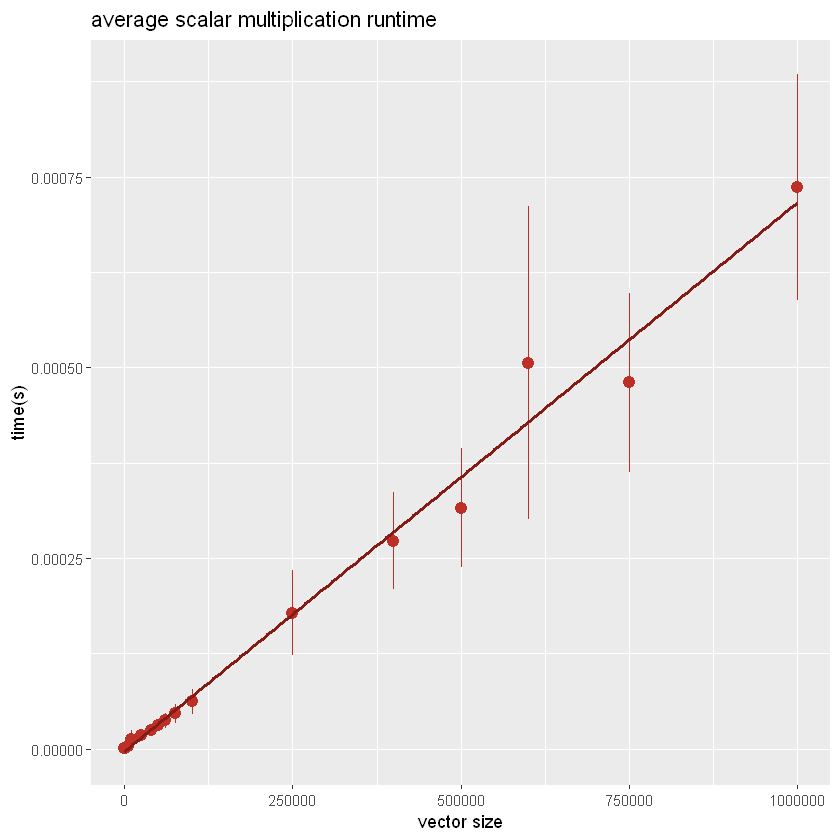

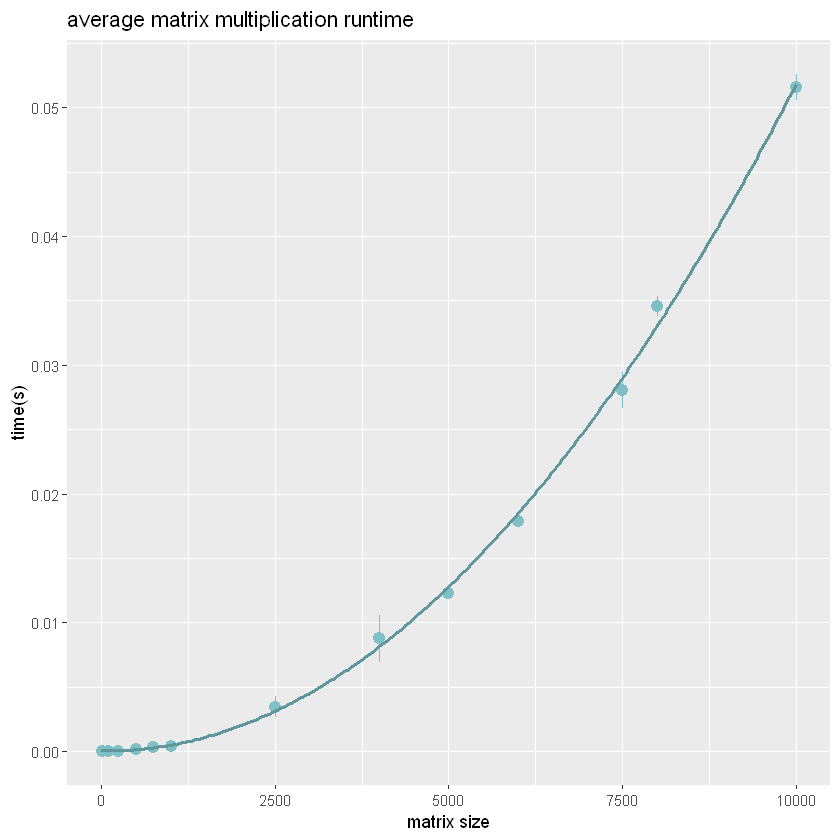

In [12]:
vec + geom_line(data=new_vec, aes(vector_size, time_mean, group = 1), size = 1.1, colour="#851b14")
mat + geom_line(data=new_mat, aes(vector_size, time_mean, group = 1), size = 1.1, colour="#60979c")